In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sceb.scdd as sd
import scanpy.api as sc
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the pbmc_4k data and filter the genes
pbmc_4k data is publicly available at https://support.10xgenomics.com/single-cell-gene-expression/datasets/2.1.0/pbmc4k
Suppose the local folder is f_path. The data can be downloaded using the following commands:
- cd f_path 
- wget http://cf.10xgenomics.com/samples/cell-exp/2.1.0/pbmc4k/pbmc4k_filtered_gene_bc_matrices.tar.gz
- tar -xzf pbmc4k_filtered_gene_bc_matrices.tar.gz

Then the load_10x_4k() function can be configured as 
- filename_data = 'f_path/filtered_gene_bc_matrices/GRCh38/matrix.mtx'
- filename_genes = 'f_path/filtered_gene_bc_matrices/GRCh38/genes.tsv'
- filename_barcodes = 'f_path/filtered_gene_bc_matrices/GRCh38/barcodes.tsv'

In [12]:
def load_10x_4k():
    filename_data = '/data/martin/single_cell/10x_4k_PBMC/filtered_gene_bc_matrices/GRCh38/matrix.mtx'
    filename_genes = '/data/martin/single_cell/10x_4k_PBMC/filtered_gene_bc_matrices/GRCh38/genes.tsv'
    filename_barcodes = '/data/martin/single_cell/10x_4k_PBMC/filtered_gene_bc_matrices/GRCh38/barcodes.tsv'
    data = sc.read(filename_data, cache=True).transpose()
    data.var_names = np.genfromtxt(filename_genes, dtype=str)[:, 1]
    data.smp_names = np.genfromtxt(filename_barcodes, dtype=str)
    return data

# Load the data.
data = load_10x_4k()
data.var_names_make_unique()
# Filter genes with >0.1 mean read per cell
sc.pp.filter_genes(data,min_counts=0.1*data.shape[0])
gene_list = np.array(data.var_names)
Nc,G,Nr,Nr_bar = sd.get_info(data)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
## Nc=4340, G=4039, Nr=4038.76, Nr_bar=1.00


# Estimate the Pearson correlation using EB and plug-in respectively
Here plug-in is also called ml (maximum likelihood). EB is also called dd (density deconvolution).

In [5]:
# Estimate the cell size factor
size_factor = sd.dd_size_factor(data)
# Estimate PC using plug-in (ml)
mean_ml,cov_ml,PC_ml  = sd.ml_covariance(data,size_factor=size_factor)
# Estimate PC using EB (dd)
mean_dd,cov_dd,PC_dd  = sd.dd_covariance(data,size_factor=size_factor,PC_prune=False)

#time start: 0.0s
n_cell=4340, n_gene=4039, Nr=4038.8
#total: 29.11s
#time start: 0.0s
n_cell=4340, n_gene=4039, Nr=4038.8
#total: 34.12s


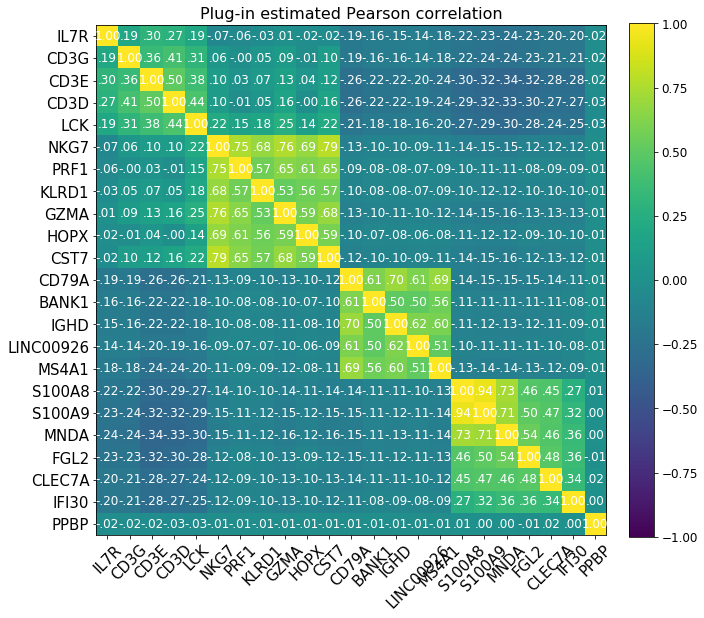

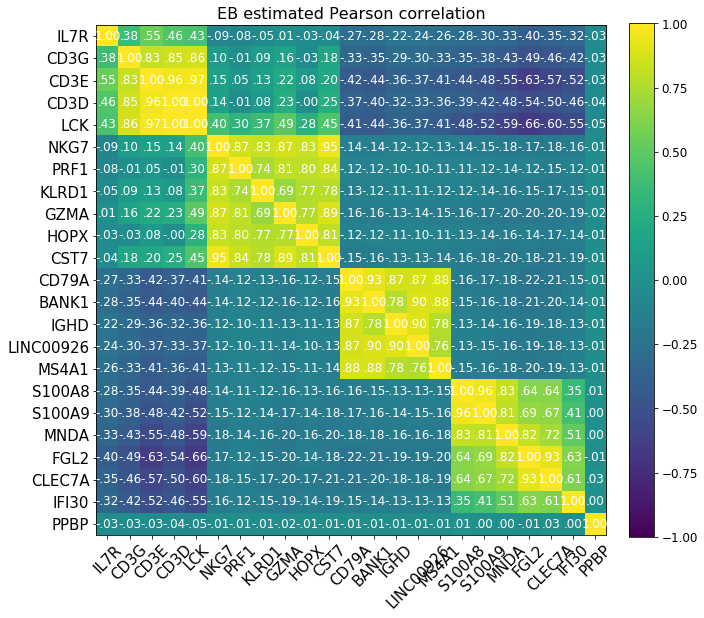

In [23]:
# Visualize the correlations for some markergenes
marker_gene_dic = {} 
marker_gene_dic['T-cells']= ['IL7R','CD3G','CD3E','CD3D','LCK']
marker_gene_dic['NK-cells']= ['NKG7','PRF1','KLRD1','GZMA','HOPX','CST7']
marker_gene_dic['B-cells']= ['CD79A','BANK1','IGHD','LINC00926','MS4A1']
marker_gene_dic['myeloid']= ['S100A8','S100A9','MNDA','FGL2','CLEC7A','CD6S','IFI30']
marker_gene_dic['Megakaryocytes']= ['PF4','PPBP']

# Plot for plug-in
plt.figure(figsize=[10, 10])
sd.marker_gene_heatmap(marker_gene_dic,gene_list,PC_ml)
plt.title('Plug-in estimated Pearson correlation', fontsize=16)
plt.show()

# Plot for EB 
plt.figure(figsize=[10, 10])
sd.marker_gene_heatmap(marker_gene_dic,gene_list,PC_dd)
plt.title('EB estimated Pearson correlation', fontsize=16)
plt.show()